In [208]:
import pickle

with open('results/out-deconv.pkl', 'rb') as f:
    data = pickle.load(f)

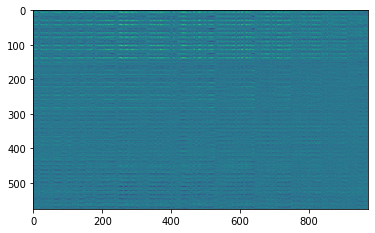

In [209]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(data)
U, S, V = np.linalg.svd(data)

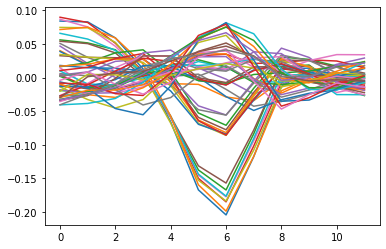

In [210]:
_ = plt.plot(U[:, 0].reshape((48, 12)).T)

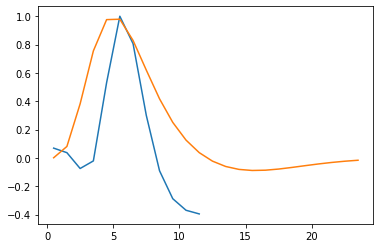

In [211]:
t = np.arange(12) + 0.5
UU, SS, VV = np.linalg.svd(U[:, 0].reshape((48, 12)))
plt.plot(t, VV[0, ::-1] / VV[0].max())

import nipy
import nipy.modalities
import nipy.modalities.fmri
import nipy.modalities.fmri.hrf

import numpy as np

t = np.arange(24) + 0.5

plt.plot(t, nipy.modalities.fmri.hrf.spmt(t)/.21)

24


array([ 0.01192613, -0.0183616 ,  0.02824934, -0.04303896,  0.06575209,
       -0.09996218,  0.15253141, -0.23148603,  0.35244014, -0.5313301 ,
        0.77631007, -1.        ,  0.95292712, -0.43601157, -0.22368195,
        0.44173131, -0.29191262,  0.18634572, -0.12292266,  0.0810081 ,
       -0.05316241,  0.03485289, -0.02277294,  0.01481348])

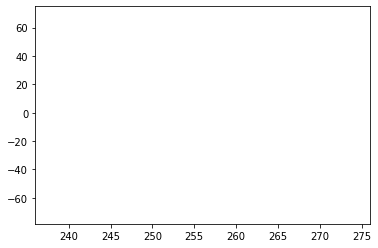

In [182]:
t = np.arange(32)

hrf = nipy.modalities.fmri.hrf.spmt(t)

ff = 1e-3
delta = np.fft.ifft(np.fft.fft(hrf) / abs(np.fft.fft(hrf)+ff) ** 2)
support = (abs(delta) > 1e-2 * abs(delta).max()).sum()
plt.plot(np.fft.fftshift(np.real(delta)))
plt.xlim((236, 276))
print(support)
weights = np.fft.fftshift(np.real(delta))[np.fft.fftshift(abs(delta) > 1e-2 * abs(delta).max())]
weights / abs(weights).max()

Find a FIR filter which best inverts the HRF.

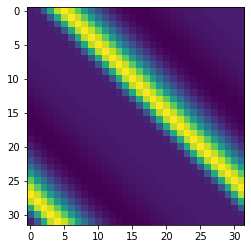

2


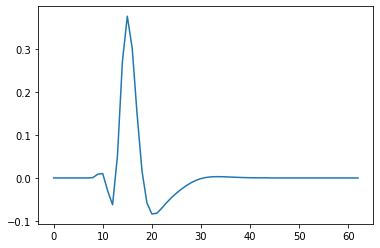

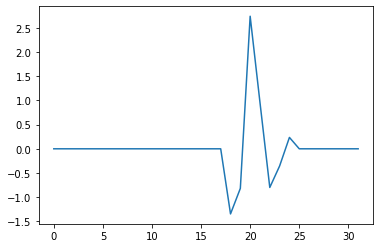

In [206]:
def find_fir(hrf, ntap):
    y = np.zeros(hrf.size)
    y[0] = 1.0
    
    hrfs = []
    for i in range(len(hrf)):
        hrfs.append(np.roll(hrf, i))
        
    the_mat = np.stack(hrfs, axis=0)
    plt.imshow(hrfs)
    plt.show()
    
    best_pos = np.argmax(hrf)
    H = np.zeros((y.size, y.size))
    idx = ntap //2
    H[:, (best_pos-idx):(best_pos+idx+1)] = 1
    #H = 1
    the_mat = the_mat * H
    
    print(best_pos-idx)
    
    lambda_ = .001
    w, _, _, _ = np.linalg.lstsq(the_mat.T.dot(the_mat) + lambda_ * np.eye(hrf.size), the_mat.T.dot(y.reshape((-1, 1))), rcond=None)
    return w

w = find_fir(hrf, 7)
w = np.fft.fftshift(w)

import scipy
import scipy.signal
plt.plot(scipy.signal.convolve2d(hrf.reshape((-1, 1)), 
                                 w[::-1].reshape((-1, 1))))
plt.show()

plt.plot(w)

In [207]:
(w[abs(w) > .1] / w.max())[::-1]

array([ 0.08587235, -0.12966623, -0.29163768,  0.34957006,  1.        ,
       -0.29865622, -0.49128265])

In [177]:
w.sum()

1.1838968649350647

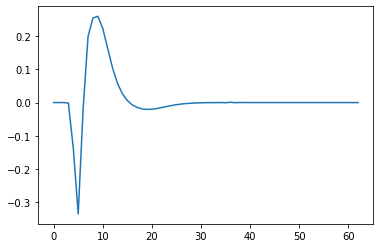

In [131]:

#plt.xlim((200, 300))